In [79]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
h, w = img.shape[0], img.shape[1]

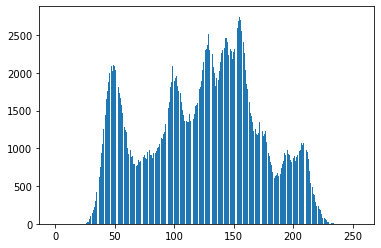

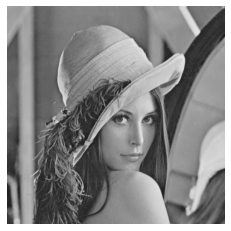

In [80]:
# (a) original image and its histogram
histogram = np.zeros(256)
for i in img:
    for j in i:
        histogram[j] = histogram[j] + 1
x = np.arange(256)
plt.bar(x,histogram)
plt.savefig('histogram.png')
plt.show()
lena = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(lena)
plt.axis('off')
plt.show()

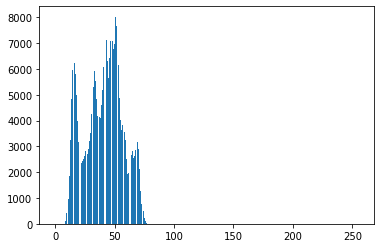

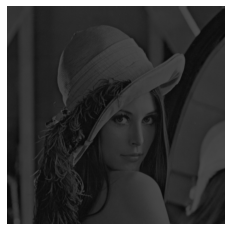

In [81]:
# (b) image with intensity divided by 3 and its histogram
img2 = np.zeros([h, w], dtype=img.dtype)
for i in range(w):
    for j in range(h):
        img2[i][j] = img[i][j] / 3

histogram2 = np.zeros(256)
for i in img2:
    for j in i:
        histogram2[j] = histogram2[j] + 1
plt.bar(x,histogram2)
plt.savefig('histogram2.png')
plt.show()
lena2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(lena2)
plt.axis('off')
plt.savefig('lena2.png')
plt.show()

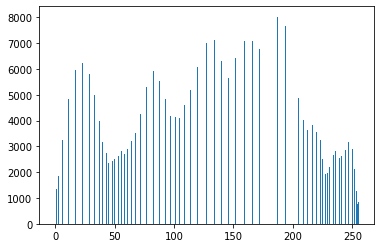

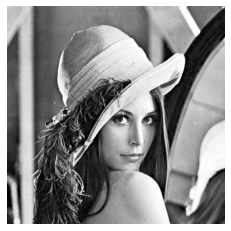

In [82]:
# (c) image after applying histogram equalization to (b) and its histogram
cdf = np.zeros(256)
cdf[0] = histogram2[0]
for i in range(1, 256):
    cdf[i] = (histogram2[i] + cdf[i-1])
for i in range(1, 256):
    cdf[i] = round(cdf[i] / (h * w) * 255)
for i in range(h):
    for j in range(w):
        img2[i][j] = cdf[img2[i][j]]

histogram3 = np.zeros(256)
for i in img2:
    for j in i:
        histogram3[j] = histogram3[j] + 1
plt.bar(x,histogram3)
plt.savefig('histogram3.png')
plt.show()

lena3 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(lena3)
plt.axis('off')
plt.savefig('lena3.png')
plt.show()